<a href="https://colab.research.google.com/github/alestarbucks/zdt-moga/blob/main/moga_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Hacer gráficas scatter con los fitness de todos los individuos y los respectivos frentes de paretos óptimos de cada problema benchmark, y guardarlos en el directorio pyplots.

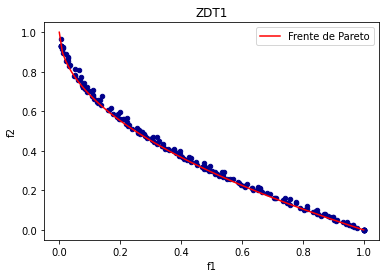

In [137]:
df1 = pd.read_csv('csvs/scores1.csv', header=None)
df1.columns = ['f1','f2']
df1.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
plt.plot(x,y,'r',label='Frente de Pareto')
plt.legend()
plt.title('ZDT1')
plt.savefig('pyplots/ZDT1',dpi=300)

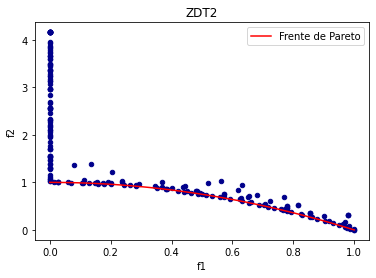

In [138]:
df2 = pd.read_csv('csvs/scores2.csv', header=None)
df2.columns = ['f1','f2']
df2.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,2)
plt.plot(x,y,'r',label='Frente de Pareto')
plt.legend()
plt.title('ZDT2')
plt.savefig('pyplots/ZDT2',dpi=300)

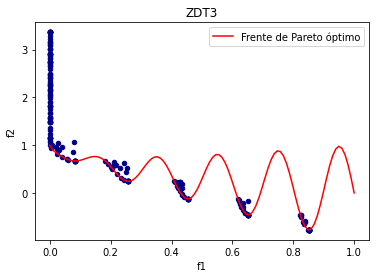

In [139]:
df3 = pd.read_csv('csvs/scores3.csv', header=None)
df3.columns = ['f1','f2']
df3.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)-(x*np.sin(10*math.pi*x))
plt.plot(x,y,'r',label='Frente de Pareto óptimo')
plt.legend()
plt.title('ZDT3')
plt.savefig('pyplots/ZDT3',dpi=300)

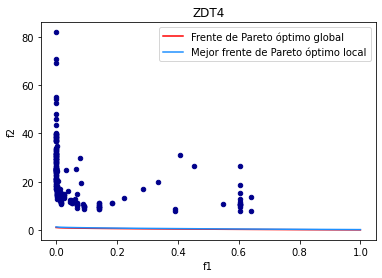

In [140]:
df4 = pd.read_csv('csvs/scores4.csv', header=None)
df4.columns = ['f1','f2']
df4.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
plt.plot(x,y,'r',label='Frente de Pareto óptimo global')
y=1.25*(1-np.power(x/1.25,0.5))
plt.plot(x,y,'dodgerblue',label='Mejor frente de Pareto óptimo local')
plt.legend()
plt.title('ZDT4')
plt.savefig('pyplots/ZDT4',dpi=300)

/tmp/ipykernel_15079/2357306279.py:6: RuntimeWarning: divide by zero encountered in true_divide
  y=10/x
/tmp/ipykernel_15079/2357306279.py:8: RuntimeWarning: divide by zero encountered in true_divide
  y=11/x


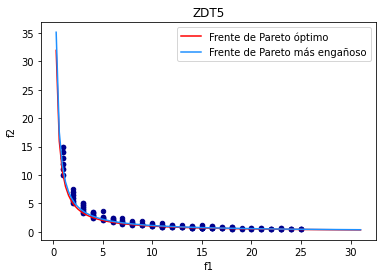

In [141]:
df5 = pd.read_csv('csvs/scores5.csv', header=None)
df5.columns = ['f1','f2']
df5.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0,31,100)
y=10/x
plt.plot(x,y,'r',label='Frente de Pareto óptimo')
y=11/x
plt.plot(x,y,'dodgerblue',label='Frente de Pareto más engañoso')
plt.legend()
plt.title('ZDT5')
plt.savefig('pyplots/ZDT5',dpi=300)

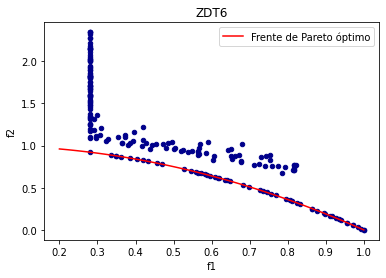

In [142]:
df6 = pd.read_csv('csvs/scores6.csv', header=None)
df6.columns = ['f1','f2']
df6.plot.scatter(x='f1', y='f2', c='DarkBlue')

x=np.linspace(0.2,1,100)
y=1-np.power(x,2)
plt.plot(x,y,'r',label='Frente de Pareto óptimo')
plt.legend()
plt.title('ZDT6')
plt.savefig('pyplots/ZDT6',dpi=300)

Definimos funciones para ayudar a calcular el máximo error del frente óptimo de Pareto.

In [155]:
def nearest_dist(f1, f2, x, y, verb=False):
    '''
    explores the space of distances of the solution characterized by fitnesses f1 and f2 as compared to the solutions that comprise
    the optimal Pareto front
    '''

    min_dist = math.inf
    for i in range(len(y)):
        aux = math.sqrt((f1-x[i])**2 + (f2-y[i])**2)
        if aux < min_dist:
            if verb:
                print("---")
                print(f1, f2)
                print(x[i], y[i])
                print("---")
            min_dist = aux
    
    return min_dist

# # test
# nearest_dist(1,6.7193e-09,x=np.linspace(0,1,100),y=1-np.power(x,2))

In [144]:
df_1 = pd.read_csv('csvs/fval1.csv', header=None)
df_2 = pd.read_csv('csvs/fval2.csv', header=None)
df_3 = pd.read_csv('csvs/fval3.csv', header=None)
df_4 = pd.read_csv('csvs/fval4.csv', header=None)
df_5 = pd.read_csv('csvs/fval5.csv', header=None)
df_6 = pd.read_csv('csvs/fval6.csv', header=None)


In [159]:
max_errors = []

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
for column_name, data in df_1.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,2)
for column_name, data in df_2.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,0.5)-(x*np.sin(10*math.pi*x))
for column_name, data in df_3.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0,1,100)
y=1-np.power(x,0.5)
for column_name, data in df_4.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0.000001,31,100)
y=10/x
for column_name, data in df_5.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

worst_error = 0
x=np.linspace(0.2,1,100)
y=1-np.power(x,2)
for column_name, data in df_6.iterrows():
    f1 = data[0]
    f2 = data[1]
    
    aux = nearest_dist(f1, f2, x, y)
    
    if aux > worst_error:
        worst_error = aux
max_errors.append(worst_error)

# ------

max_errors


[0.030612250117843253,
 3.157200000558723,
 2.3632,
 35.73800001011519,
 0.6479906549722413,
 1.1930379283157766]